In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\omkar\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.shape

(21613, 21)

In [4]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

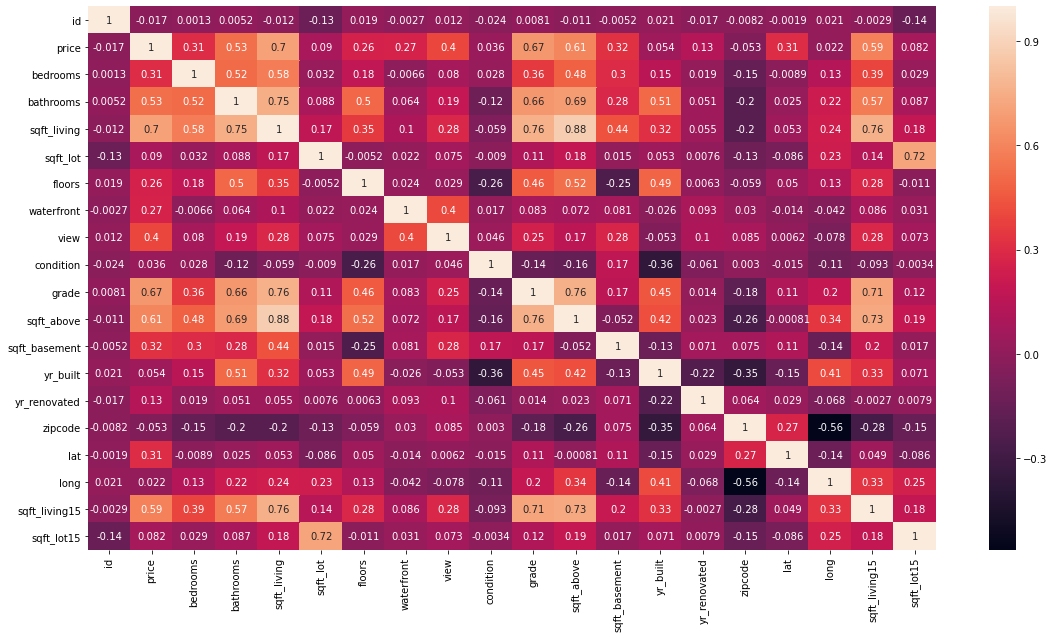

In [6]:
plt.figure(figsize=(19,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

#### 1] bathroom 2] sqft_living 3] grade 4] sqft_above 5] sqft_living15

### This are having correlation with Price.

In [7]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21611.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.396095,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.128162,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


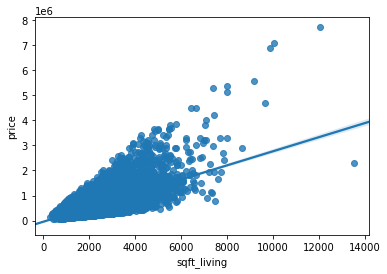

In [8]:
sns.regplot(data=df,x="sqft_living",y="price")
plt.show()

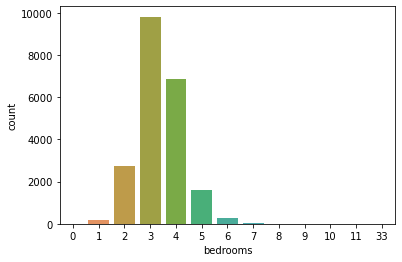

In [9]:
plt.figure()
sns.countplot(data=df,x="bedrooms")
plt.show()

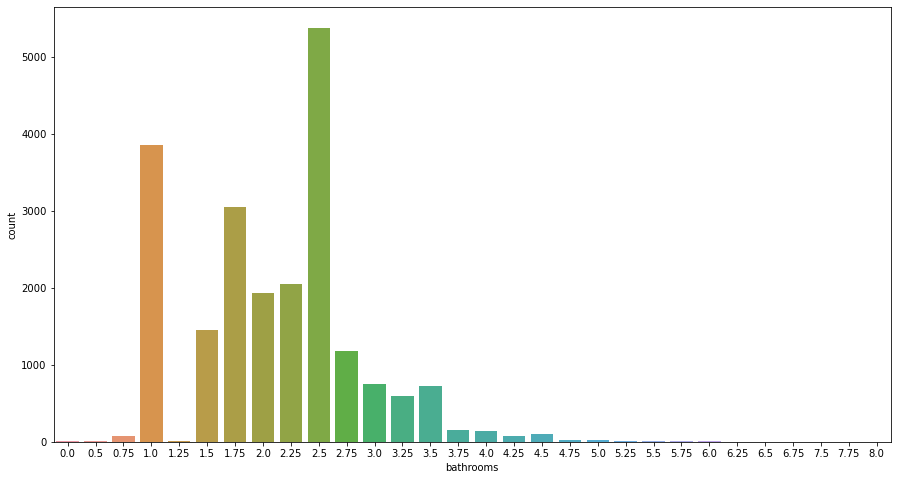

In [10]:
plt.figure(figsize=(15,8))
sns.countplot(data=df,x="bathrooms")
plt.show()

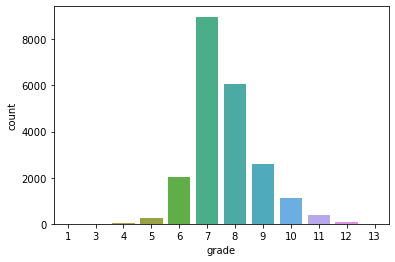

In [11]:
plt.figure()
sns.countplot(data=df,x='grade')
plt.show()

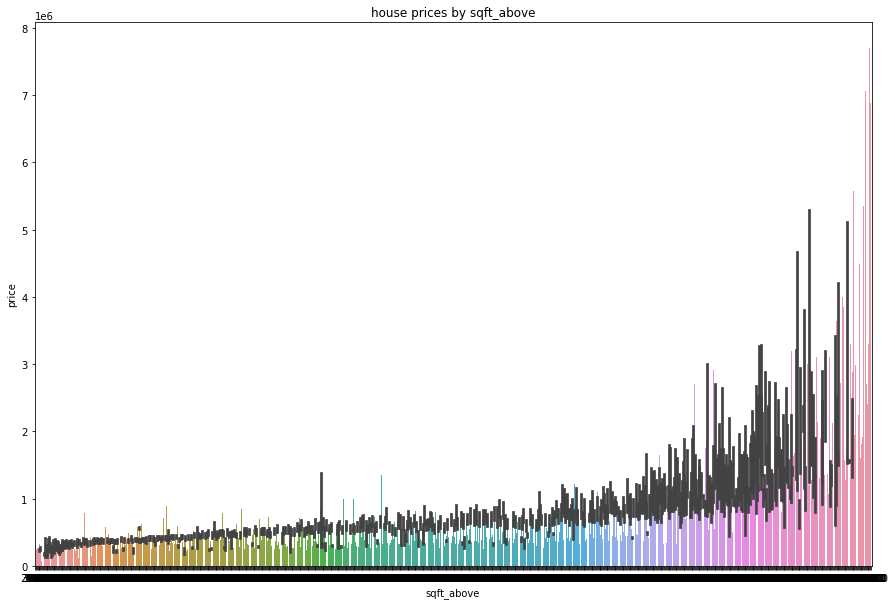

In [12]:
plt.figure(figsize=(15,10))
plt.title("house prices by sqft_above")
plt.xlabel('sqft_above')
plt.ylabel('house prices')
sns.barplot(x='sqft_above',y='price',data=df)

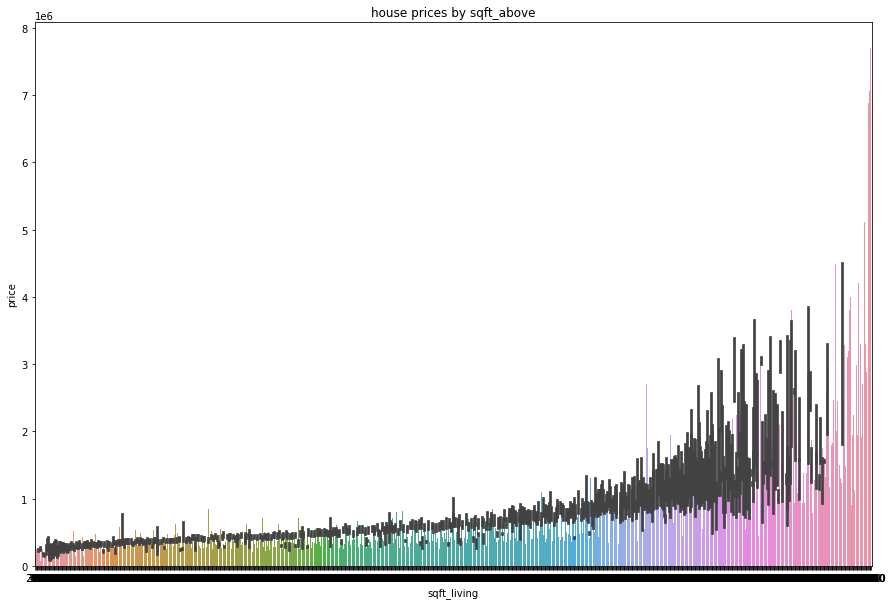

In [13]:
plt.figure(figsize=(15,10))
plt.title("house prices by sqft_above")
plt.xlabel('sqft_living')
plt.ylabel('house prices')
sns.barplot(x='sqft_living',y='price',data=df)

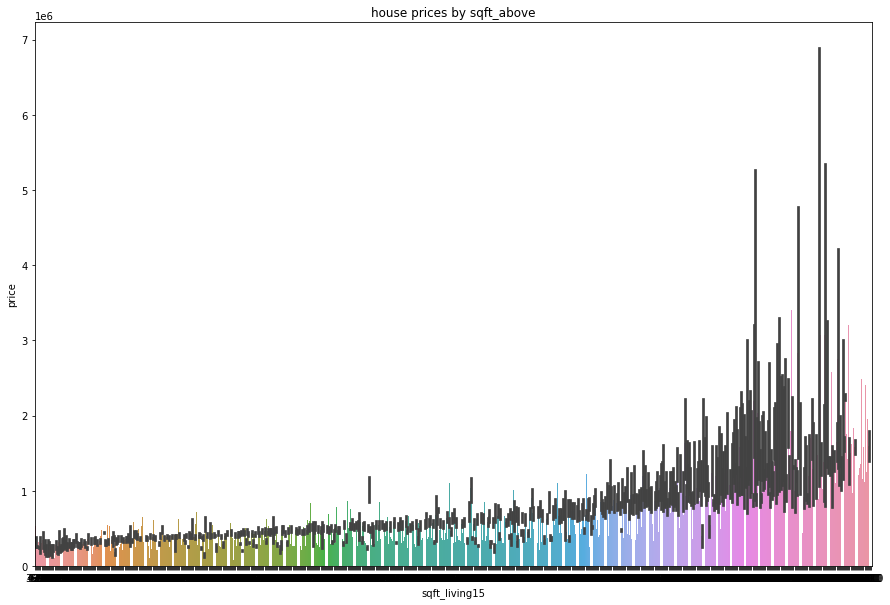

In [14]:
plt.figure(figsize=(15,10))
plt.title("house prices by sqft_above")
plt.xlabel('sqft_living15')
plt.ylabel('house prices')
sns.barplot(x='sqft_living15',y='price',data=df)

In [15]:
# Check Skewness of columns

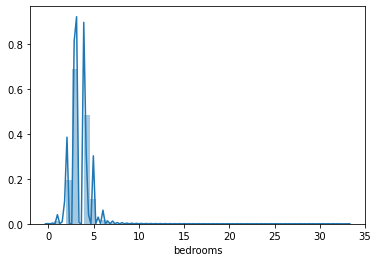

In [16]:
plt.figure()
sns.distplot(df["bedrooms"],kde=True)
plt.show()

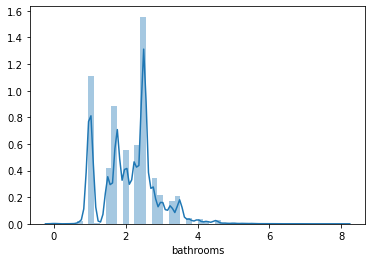

In [17]:
plt.figure()
sns.distplot(df["bathrooms"],kde=True)
plt.show()

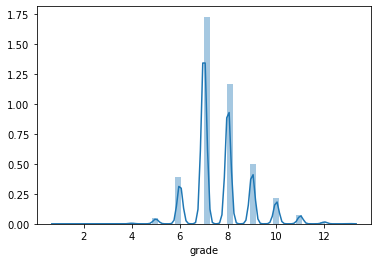

In [18]:
plt.figure()
sns.distplot(df["grade"],kde=True)
plt.show()

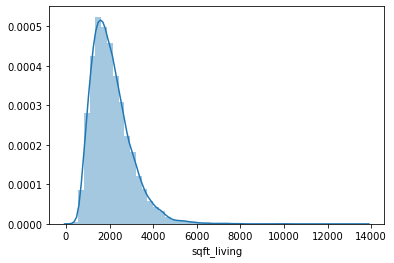

In [19]:
plt.figure()
sns.distplot(df["sqft_living"],kde=True)
plt.show()

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [21]:
def model(X):
    X= df[X]
    y= df["price"]
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)
    lr = LinearRegression()    #fit will give the thita1 and thita0
    lr.fit(X_train,y_train)    #it will fit the model(dataSet)
    print("intercept",lr.intercept_)
    print("slope",lr.coef_)
    y_pred=lr.predict(X_test)
    print("MSE",mean_squared_error(y_test,y_pred))
    print("R2",r2_score(y_test,y_pred))
    
    residuals = y_test - y_pred
    
    plt.scatter(y_pred,residuals)
    plt.show()
    
    sns.distplot(residuals)
    plt.show()

intercept -31356.7845748635
slope [273.80839877]
MSE 77554859321.62436
R2 0.5030774643470595


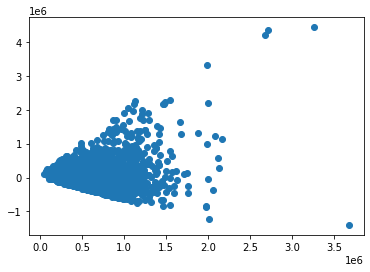

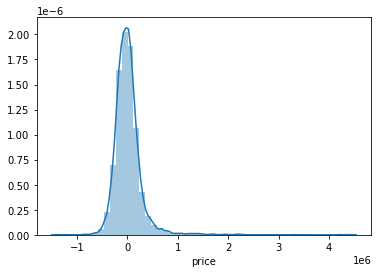

In [22]:
model(["sqft_living"])

intercept -1015944.013773218
slope [202814.72576988]
MSE 87062336893.06696
R2 0.44215955534961005


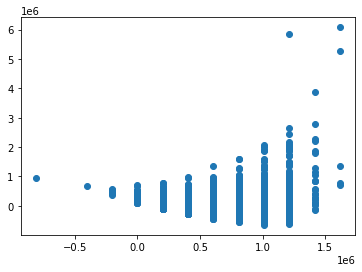

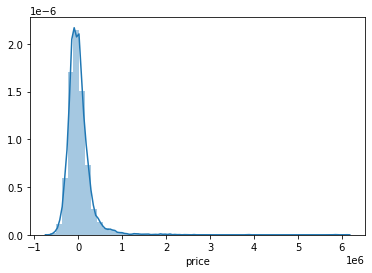

In [23]:
model(["grade"])

intercept -63417.15046705108
slope [302.96529038]
MSE 101200767537.94864
R2 0.35156942511583755


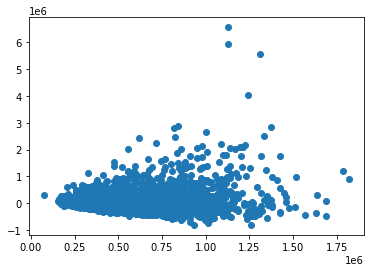

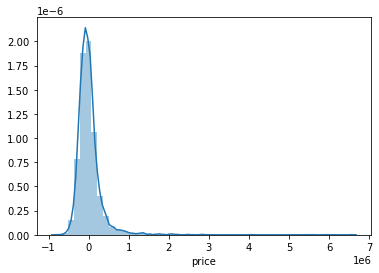

In [24]:
model(["sqft_living15"])

intercept 152044.37156466697
slope [114485.28435528]
MSE 140388576080.94067
R2 0.10047870870942044


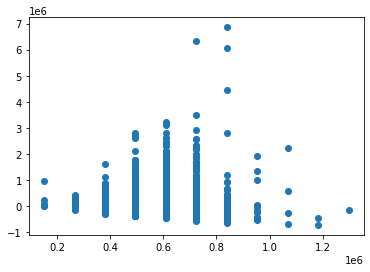

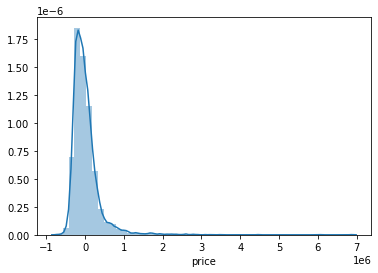

In [25]:
model(["bedrooms"])

intercept 26476.46659278724
slope [241566.36727107]
MSE 111707830434.43005
R2 0.2842468049414927


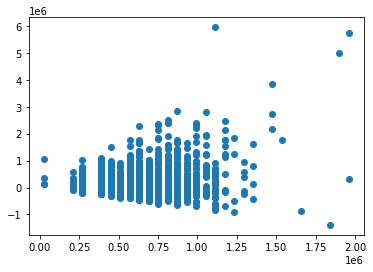

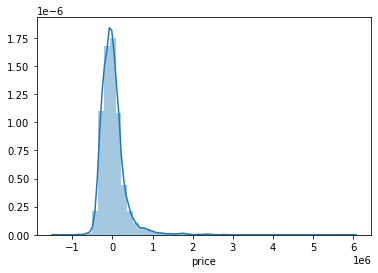

In [26]:
model(["bathrooms"])

### Multiple Linear Regression

intercept -476492.97543498967
slope [ 2.12455705e+02  9.50182968e+04  8.58341146e+00 -3.48304605e+04
 -2.59579873e+04]
MSE 70328630761.09874
R2 0.549378571085098


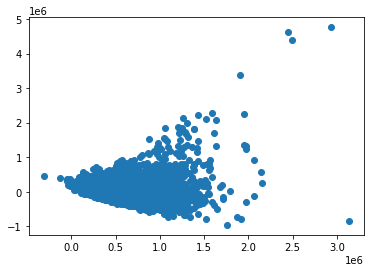

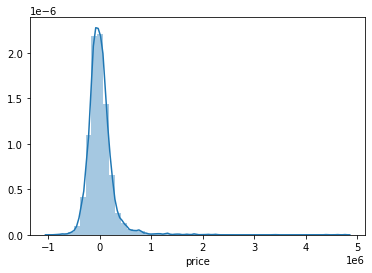

In [27]:
model(["sqft_living","grade","sqft_living15","bedrooms","bathrooms"])

### Polynomial Linear Regression

In [28]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2)

In [29]:
X =df[["sqft_living","grade","sqft_living15","bedrooms","bathrooms"]]
X_poly=pf.fit_transform(X)

MSE 58696309661.11246
R2 0.6239111348353963


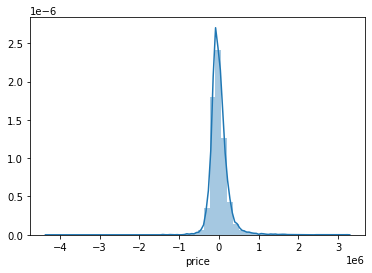

In [30]:
    y= df["price"]
    X_train,X_test,y_train,y_test=train_test_split(X_poly,y,test_size=0.3,random_state=1)
    lr = LinearRegression()
    lr.fit(X_train,y_train)
   
    y_pred=lr.predict(X_test)
    print("MSE",mean_squared_error(y_test,y_pred))
    print("R2",r2_score(y_test,y_pred))
    
    residuals = y_test - y_pred
    
    sns.distplot(residuals)
    plt.show()

In [31]:
pf = PolynomialFeatures(degree=3)
X =df[["sqft_living","grade","sqft_living15"]]
X_poly=pf.fit_transform(X)

MSE 58678015905.77259
R2 0.6240283496607422


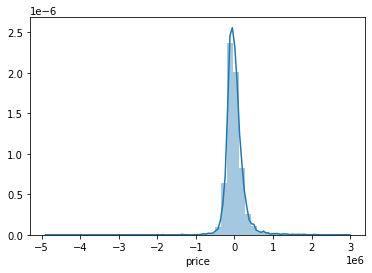

In [32]:
    y= df["price"]
    X_train,X_test,y_train,y_test=train_test_split(X_poly,y,test_size=0.3,random_state=1)
    lr = LinearRegression()
    lr.fit(X_train,y_train)
   
    y_pred=lr.predict(X_test)
    print("MSE",mean_squared_error(y_test,y_pred))
    print("R2",r2_score(y_test,y_pred))
    
    residuals = y_test - y_pred
    
    sns.distplot(residuals)
    plt.show()

### Mean Squared Error 

### R-Squared

### Linear Regression

### Multiple Linear Regression

### Polynomial Regression